In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
#path = "C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Predictions éléctions\\PRESIDENTIELLES_1965-2012-csv\\" 
#path_to_csv = "C:\\Users\\Mohamed\\git\\Elections\\Analyses\\Jointure des tables\\"
import matplotlib.pyplot as plt
%matplotlib inline

ls

In [14]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [15]:
dft11.columns

Index(['Unnamed: 0', 'département', 'code', 'Année', 'taux_Blancs et nuls',
       'taux_xdroite', 'taux_gauche', 'taux_Abstention', 'taux_xgauche',
       'taux_centre', 'taux_vert', 'taux_droite', 'depart_frontalier',
       'depart_OM', 'depart_CORSE', '0-19ans', '20-39ans', '40-59ans',
       '60-74ans', '75+ans', 'Total', 'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dis

In [16]:
dft11.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
dft11.columns

Index(['département', 'code', 'Année', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

# Taux de gauche : 

In [18]:
dft12 = dft11.drop(["code", "département", 'taux_Abstention', 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert', 'taux_xdroite','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date"], axis=1)

dft12 = dft12[dft12["Année"]!=1981]

dft12["Date"] = dft12["Année"] - 1987

dft12.dropna(axis=1, inplace=True)

df_train = dft12[dft12["Année"]!=2012]
df_train.drop("Année", axis=1, inplace=True)
df_test = dft12[dft12["Année"]==2012]
df_test.drop("Année", axis=1, inplace=True)
df_train_x = df_train.drop("taux_gauche", axis=1)
df_train_y = df_train["taux_gauche"]
df_test_x = df_train.drop("taux_gauche", axis=1)
df_test_y = df_train["taux_gauche"]



/home/brehelin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/brehelin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
ss = StandardScaler()
df_train_x = ss.fit_transform(df_train_x)
df_test_x = ss.transform(df_test_x)

In [21]:
svr = LinearSVR()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

svr.score(df_test_x, df_test_y)

3.9488394723
1.41189686827


0.88055222867081218

In [22]:
svr = LinearRegression()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_train.drop("taux_gauche", axis=1).columns[i])

svr.score(df_test_x, df_test_y)


3.50872183106
1.4694038405
0.0469814137331 depart_frontalier
0.146822191185 depart_CORSE
0.155799221366 0-19ans
-0.00610623569421 20-39ans
-1.97796037995 40-59ans
-0.999583015436 60-74ans
1.70084758139 75+ans
0.0165243824501 Naissances domiciliées par département
-0.493072462614 Nombre total de mariages domiciliés
-0.555192731157 Décès domiciliés par département
0.124192587972 var_chomage_annee
-0.00333223419203 taux_chomage
-0.773040036092 taux_centre_sup_moyenne
-0.944024132466 taux_droite_sup_moyenne
0.928097644251 taux_gauche_sup_moyenne
0.572193468342 taux_vert_sup_moyenne
-1.28163620709 taux_xdroite_sup_moyenne
0.0890133379801 taux_xgauche_sup_moyenne
0.0189663923001 taux_Abstention_sup_moyenne
-0.395986603642 taux_Blancs et nuls_sup_moyenne
-0.220524831511 pop_centre
-0.329042717116 pop_droite
0.169355923346 pop_gauche
-0.362348666349 pop_xdroite
-0.476084588471 pop_xgauche
-0.163620845185 pop_premier_ministre
-0.327218171805 cohabitation
0.0206179408234 pop_president
0.25989063

0.89386527209479427

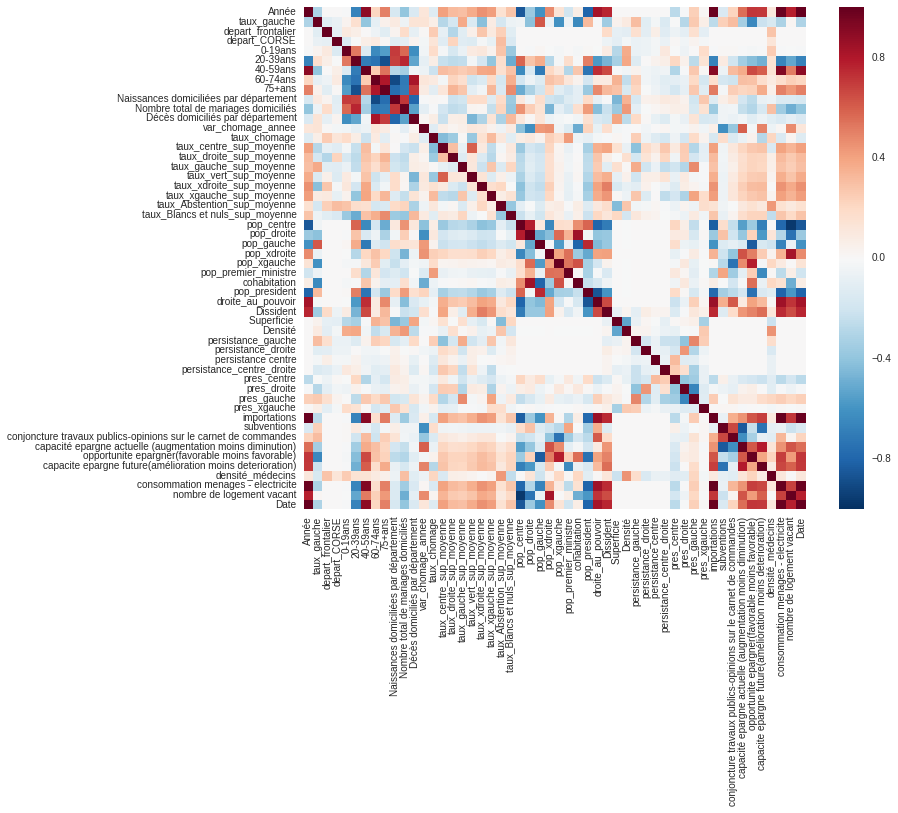

In [30]:
corrmat = dft12.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [31]:
# df_train_x1 = df_train_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# df_test_x1 = df_test_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# print(df_test_x1.shape, df_train_x1.shape)
X = sm.add_constant(df_train_x)
X_test = sm.add_constant(df_test_x)

model = sm.OLS(df_train_y, X)
results = model.fit()
print(metrics.r2_score(results.predict(X_test), df_test_y))

#print(metrics.r2_score(model.predict(df_test_x), df_test_y))
print(results.summary())

0.881263171063
                            OLS Regression Results                            
Dep. Variable:            taux_gauche   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.74
Date:              ven., 24 mars 2017   Prob (F-statistic):          1.22e-147
Time:                        15:43:05   Log-Likelihood:                -785.88
No. Observations:                 384   AIC:                             1644.
Df Residuals:                     348   BIC:                             1786.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.5437      0.100    2

In [40]:
svr = DecisionTreeRegressor(max_depth=10)
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))
print("\n")
for i in range(len(svr.feature_importances_)):
    print(svr.feature_importances_[i], df_train.drop("taux_gauche", axis=1).columns[i])



0.0809423383552
0.125539832788
0.99755158902


0.000300621766593 depart_frontalier
1.04220161861e-05 depart_CORSE
0.001168374398 0-19ans
0.00280890537656 20-39ans
0.00874619906882 40-59ans
0.00285015465313 60-74ans
0.00118713565006 75+ans
0.00721036132875 Naissances domiciliées par département
0.00465472379048 Nombre total de mariages domiciliés
0.0112645612994 Décès domiciliés par département
0.00939917323692 var_chomage_annee
0.00735814676388 taux_chomage
0.00544478386836 taux_centre_sup_moyenne
0.000434491683551 taux_droite_sup_moyenne
0.173070368855 taux_gauche_sup_moyenne
0.000768269644469 taux_vert_sup_moyenne
0.0114879798573 taux_xdroite_sup_moyenne
0.00834900798494 taux_xgauche_sup_moyenne
0.00453208745185 taux_Abstention_sup_moyenne
0.00912437145588 taux_Blancs et nuls_sup_moyenne
3.76757337263e-06 pop_centre
0.0 pop_droite
0.0 pop_gauche
0.00258496640691 pop_xdroite
1.16457217173e-05 pop_xgauche
0.000356766249117 pop_premier_ministre
0.0 cohabitation
0.587450367133 pop_presid

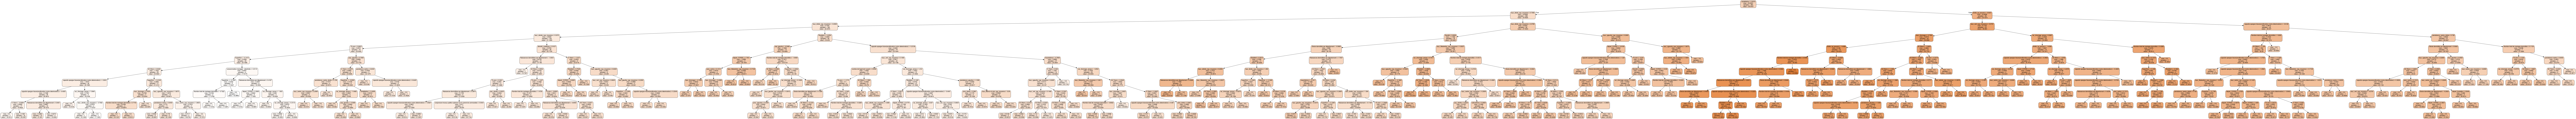

In [44]:
dot_data = tree.export_graphviz(svr, out_file=None,
                         feature_names=df_train.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [45]:
graph.write_pdf("decision_tree_print.pdf")

True

In [35]:
svr = linear_model.Lasso(alpha=0.01)

svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_test.drop("taux_gauche", axis=1).columns[i])
    
print(svr.score(df_test_x, df_test_y))

3.53074713704
1.46723834654
0.893199032373
-0.0 depart_frontalier
0.0819795147556 depart_CORSE
0.0962450513841 0-19ans
-0.0 20-39ans
-1.89035605433 40-59ans
-0.860895629556 60-74ans
1.16345952465 75+ans
0.0 Naissances domiciliées par département
-0.447742512839 Nombre total de mariages domiciliés
-0.270285032414 Décès domiciliés par département
0.0926659445342 var_chomage_annee
-0.0 taux_chomage
-0.709189152538 taux_centre_sup_moyenne
-0.853071223663 taux_droite_sup_moyenne
1.00990386456 taux_gauche_sup_moyenne
0.510586809773 taux_vert_sup_moyenne
-1.27554378909 taux_xdroite_sup_moyenne
0.0904781239358 taux_xgauche_sup_moyenne
0.00178123546366 taux_Abstention_sup_moyenne
-0.346846053207 taux_Blancs et nuls_sup_moyenne
-0.0 pop_centre
-0.0 pop_droite
0.0 pop_gauche
-0.0 pop_xdroite
-2.02734654 pop_xgauche
-0.0 pop_premier_ministre
-0.0 cohabitation
0.0 pop_president
0.0 droite_au_pouvoir
-1.02333124399 Dissident
0.0327298432897 Superficie 
0.498968523193 Densité
0.809173439135 persistan